# Imports

In [1]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import matplotlib.pyplot as plt

In [2]:
import h5py
import os
import sys
import struct
import time
import pandas as pd
from scipy.io import loadmat

In [3]:
# import src.DeepGaze.deepgaze_pytorch as deepgaze_pytorch

In [4]:
# DEVICE = 'cpu'


## Load NSD images 

In [26]:
COCO_ROOT = '/gpfs01/bartels/user/hbhatnagar/coco/panoptic_annotations_trainval2017'
NSD_ROOT  = "/gpfs01/bartels/user/hbhatnagar/NSD_dataset/"
STIM_ROOT  = NSD_ROOT + "nsddata_stimuli/stimuli/nsd/"


stim_file = STIM_ROOT + "nsd_stimuli.hdf5"
exp_design_file = NSD_ROOT + "nsddata/experiments/nsd/nsd_expdesign.mat"
nsd_stiminfo_file = '/gpfs01/bartels/user/hbhatnagar/NSD_dataset/nsddata/experiments/nsd/nsd_stim_info_merged.pkl'
DATA_PATH = "/gpfs01/bartels/user/hbhatnagar/nsd-static-saliency/data"


PRF_PATH = '/gpfs01/bartels/user/hbhatnagar/NSD_dataset/nsddata/ppdata/subj01/func1mm/'
ROI_PATH = '/gpfs01/bartels/user/hbhatnagar/NSD_dataset/nsddata/ppdata/'

In [7]:
# image_data_set = h5py.File(stim_file, 'r')

# for key, value in image_data_set.items() :
#     print(key,": \n", value,"\n")
    
# image_data = np.copy(image_data_set['imgBrick'])
# image_data_set.close()

In [8]:
# stiminfo = pd.read_pickle(nsd_stiminfo_file)

# subject=1

# image_data_set = h5py.File(STIM_ROOT + "S%d_stimuli_227.h5py"%subject, 'r') # For example - S01_stimuli_227.h5py
# image_data = np.copy(image_data_set['stimuli'])
# image_data_set.close()

# print (image_data.shape) # Orig. 10,000 x 3 x 227 x 227
# print (image_data.dtype)
# print (np.min(image_data[0]), np.max(image_data[0]))

In [9]:
# plt.figure(figsize=(18,6))

# num_images = 4 
# for i in range(num_images):
#     plt.subplot(1,num_images,i+1)
#     plt.imshow(image_data[7+i].transpose((1,2,0)), cmap='gray', interpolation='None')
#     plt.gca().get_xaxis().set_visible(False)
#     plt.gca().get_yaxis().set_visible(False)

Higher res images 

In [10]:
# image_data_set = h5py.File(stim_file, 'r')

# for key, value in image_data_set.items() :
#     print(key,": \n", value,"\n")
    
# image_data = np.copy(image_data_set['imgBrick'])
# image_data_set.close()

In [11]:
# exp_design = loadmat(exp_design_file)
# shared_idx   = exp_design['sharedix']
# image_data[shared_idx[0,:]].shape

In [12]:
# plt.figure(figsize=(50,20))
# shared_images = image_data[shared_idx[0,:]]

# for i in range(num_images):
#     plt.subplot(1,num_images,i+1)
    
#     plt.imshow(shared_images[10+i], cmap='gray', interpolation='None')
                        
#     plt.gca().get_xaxis().set_visible(False)
#     plt.gca().get_yaxis().set_visible(False)

# Load pRF model 

In [14]:
import nibabel as nib

In [15]:
angle_file = os.path.join(PRF_PATH, 'prf_angle.nii.gz')

In [16]:
img = nib.load(angle_file)

In [17]:
print(img.shape,img.get_data_dtype())

(145, 186, 148) float32


In [18]:
hdr = img.header
print(hdr)
print(hdr.get_zooms())

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 145 186 148   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 360
glmin           : 0
descrip         : b''
aux_file        : b'none'
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [  1.   0.   0. -72.]
srow_y  

In [19]:
angle_data = img.get_fdata()

In [20]:
mid_vox = angle_data[118:121, 118:121, 108:111]
print(mid_vox)

[[[ 22.29530716 254.50178528 152.52293396]
  [ 67.48616791 340.3996582  217.81982422]
  [ 63.11005783  67.5        337.51010132]]

 [[ 66.5687561  244.45956421 169.79904175]
  [ 37.16413879   2.63701606  20.73584175]
  [  2.09010482   0.76499504 348.57440186]]

 [[ 68.32328796 127.79325104 337.5       ]
  [225.03405762 135.         337.5826416 ]
  [337.50027466 353.02642822 322.27716064]]]


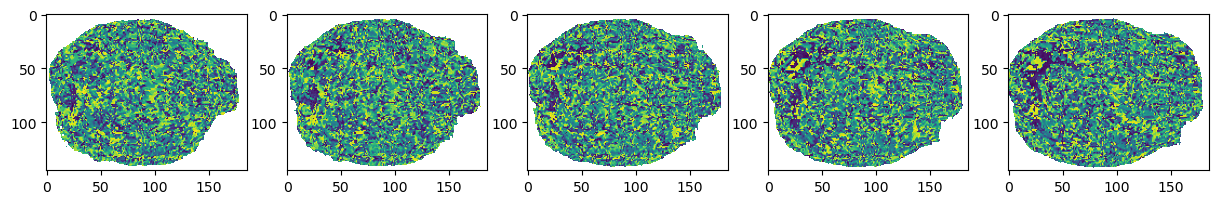

In [21]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(angle_data[:,:,50 + i])
    plt.gcf().set_size_inches(15, 15)
plt.show()

In [22]:
mid_slice_x = angle_data[119, :, :] 
print(mid_slice_x.shape)

(186, 148)


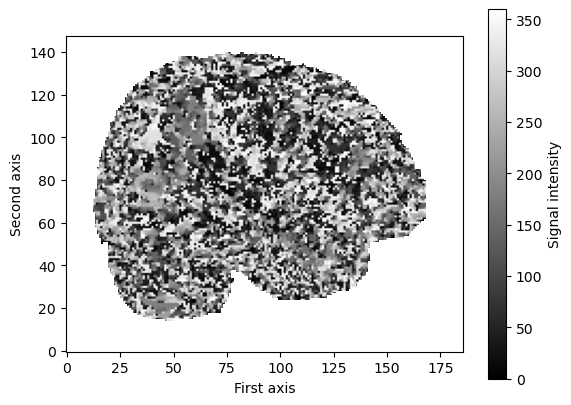

In [23]:
# transpose because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the second on the y-axis.

plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

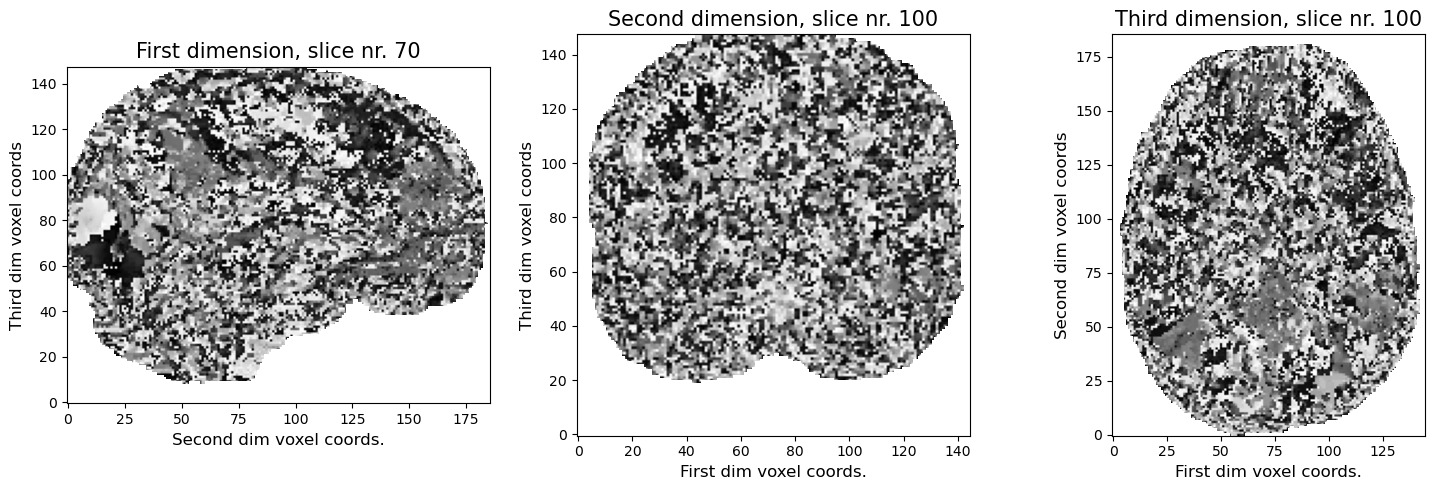

In [24]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(angle_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(angle_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(angle_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

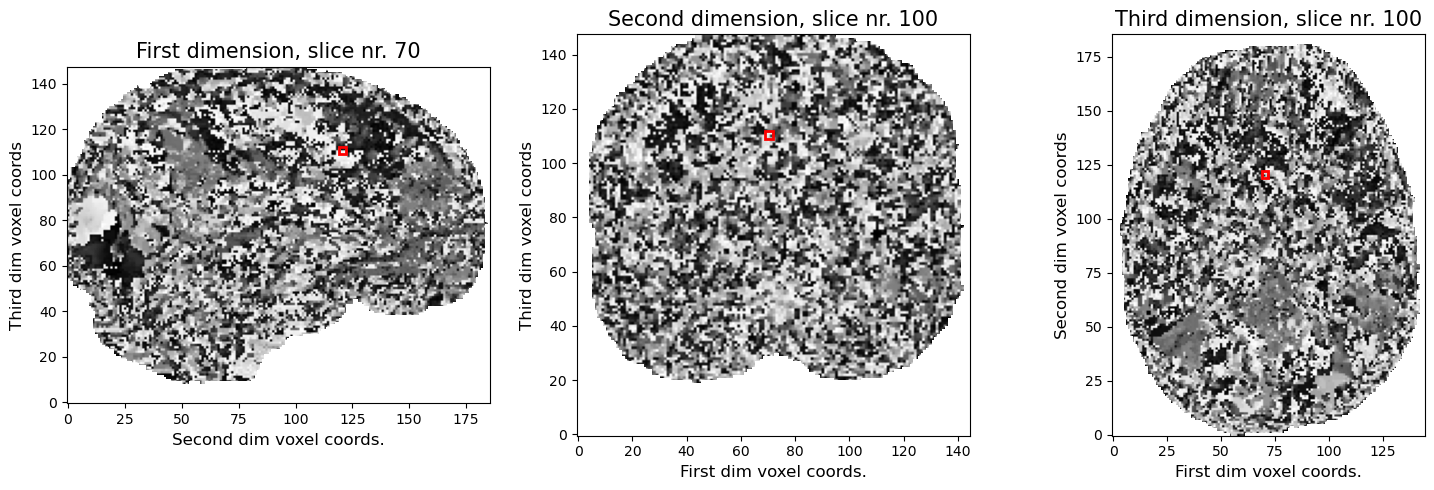

In [25]:
import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(angle_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((119, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(angle_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(angle_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 119), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

Masks of interest are : 


- `prf-visualrois` is a collection of manually drawn ROIs based on results of the prf experiment

    These ROIs consist of V1v, V1d, V2v, V2d, V3v, V3d, and hV4. 

    These ROIs extend from the fovea (0° eccentricity) to peripheral cortical regions that still exhibit sensible signals in the prf experiment given the limited stimulus size (this means up to about ~5-6° eccentricity).


Other possible masks of interest: 

1. `floc-faces`: OFA, FFA-1, FFA-2, mTL-faces ("mid temporal lobe faces"), and aTL-faces ("anterior temporal lobe faces")
2. `floc-words`: OWFA, VWFA-1, VWFA-2, mfs-words ("mid fusiform sulcus words"), and mTL-words ("mid temporal lobe words")
3. `floc-places`: OPA, PPA, and RSC
4. `floc-bodies`: EBA, FBA-1, FBA-2

Note that for the `floc-faces`, `floc-words`, and `floc-bodies` ROIs, not all subjects have all of these ROIs in every hemisphere.


Other interesting ROIs from the Wang15 Atlas as well.

In [32]:
def load_mask_from_nii(mask_nii_file):
    return nib.load(mask_nii_file).get_fdata()

In [33]:
subject = 1 
voxel_roi = load_mask_from_nii(ROI_PATH + "subj%02d/func1mm/roi/prf-visualrois.nii.gz"%subject) 

In [34]:
print("Shape of pRF-visual ROI mask: %s " %(voxel_roi.shape,))

Shape of pRF-visual ROI mask: (145, 186, 148) 


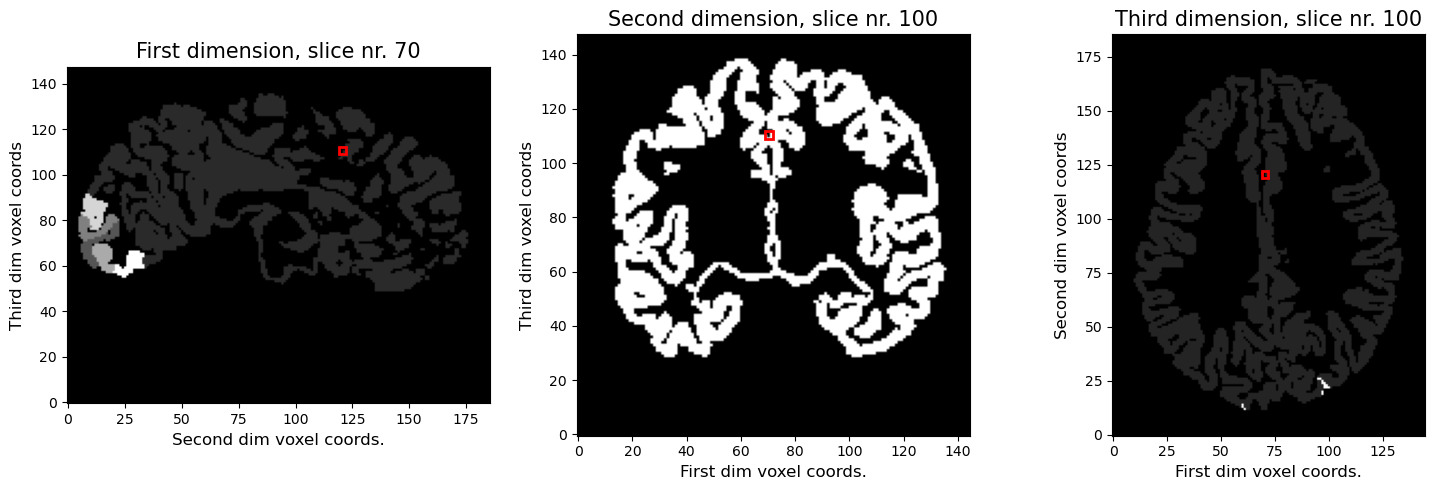

In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

mask_property =  voxel_roi 

ax[0].imshow(mask_property[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((119, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(mask_property[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 109), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(mask_property[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 119), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

In [36]:
import nilearn
from nilearn import image
from nilearn import plotting 
from nilearn.image import math_img
%matplotlib inline

In [37]:
voxel_img = image.load_img(ROI_PATH + "subj%02d/func1mm/roi/prf-visualrois.nii.gz"%subject) 

FREESURF_PATH = '/gpfs01/bartels/user/hbhatnagar/NSD_dataset/nsddata/freesurfer/subj01/label'

In [38]:
# To be used as a background image for nilearn
t1_masked_img = image.load_img('/gpfs01/bartels/user/hbhatnagar/NSD_dataset/nsddata/ppdata/subj01/anat/T1_0pt5_masked.nii.gz')

In [39]:
voxel_data = voxel_img.get_fdata()

In [40]:
np.unique(voxel_data)

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [41]:
voxel_img_floc_faces = image.load_img(ROI_PATH + "subj%02d/func1mm/roi/floc-faces.nii.gz"%subject) 
voxel_data_floc_faces = voxel_img_floc_faces.get_fdata()
print(np.unique(voxel_data_floc_faces))

# Visual ROIs
# -1,0: Unknown 
# 1,2 : V1 (Dorsal and Ventral) 
# 3,4 : V2
# 5,6 : V3
# 7   : V4

# floc-faces 
# 0 Unknown
# 1 OFA
# 2 FFA-1
# 3 FFA-2
# 4 mTL-faces
# 5 aTL-faces

# floc-bodies
# 0 Unknown
# 1 EBA
# 2 FBA-1
# 3 FBA-2
# 4 mTL-bodies

# floc-places
# 0 Unknown 
# 1 OPA
# 2 PPA
# 3 RSC

# floc-words
# 0 Unknown
# 1 OWFA
# 2 VWFA-1
# 3 VWFA-2
# 4 mfs-words
# 5 mTL-words

[-1.  0.  1.  2.  3.  5.]


In [46]:
v1_d_img = math_img("img==1",img=voxel_img)
v1_v_img = math_img("img==2",img=voxel_img)

v2_d_img = math_img("img==3",img=voxel_img)
v2_v_img = math_img("img==4",img=voxel_img)


print(np.unique(v1_d_img.get_fdata()),np.unique(v1_v_img.get_fdata()))
print(np.unique(v2_d_img.get_fdata()),np.unique(v2_v_img.get_fdata()))
print(v1_d_img.shape,v1_v_img.shape,v2_d_img.shape,v2_v_img.shape)

[0. 1.] [0. 1.]
[0. 1.] [0. 1.]
(145, 186, 148) (145, 186, 148) (145, 186, 148) (145, 186, 148)


In [47]:
# # Sanity check by manually seperating V1 voxels and comparing with the math_img created images

# mask_v1_d = voxel_data==1
# v1_d_arr = np.where(mask_v1_d > 0, voxel_data, 0)

# np.array_equal(v1_d_arr, v1_d_img.get_fdata())


In [48]:
#Using Nilearn intersect mask and taking union 
v1_mask_img = nilearn.masking.intersect_masks([v1_d_img,v1_v_img], threshold=0, connected=True)

# Using the same method as before with a logical OR 
v1_mask_m2 = math_img("np.logical_or(img==1, img==2)",img=voxel_img)

# Using another method 
v1_mask_m3 = math_img("np.logical_or(img1, img2)", img1=v1_d_img, img2=v1_v_img)

# Check if they are equal 
print(np.array_equal(v1_mask_img.get_fdata(), v1_mask_m2.get_fdata()))
print(np.array_equal(v1_mask_m2.get_fdata(), v1_mask_m3.get_fdata()))


False
True


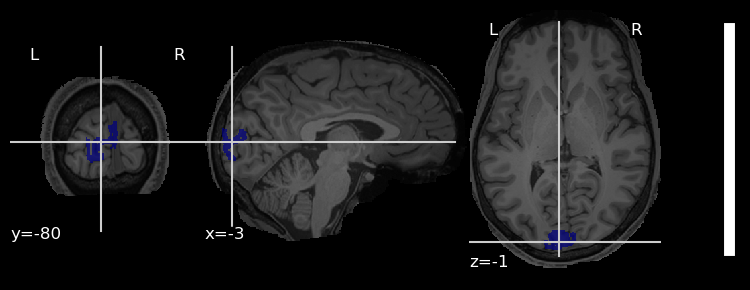

In [51]:
display = plotting.plot_roi(v1_mask_img,colorbar=True,bg_img =t1_masked_img)

In [52]:
display.close()

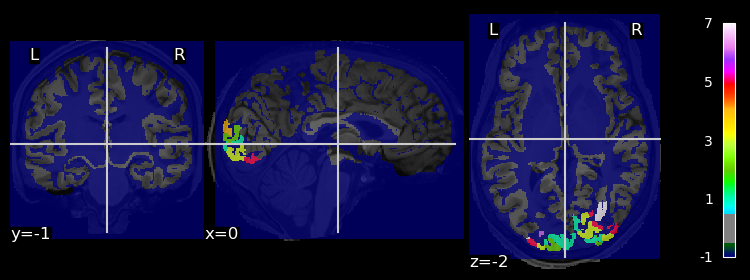

In [53]:
display = plotting.plot_roi(voxel_img,colorbar=True,bg_img =t1_masked_img)


In [54]:
display.close()

/gpfs01/bartels/user/hbhatnagar/anaconda3/envs/NSD-Saliency/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



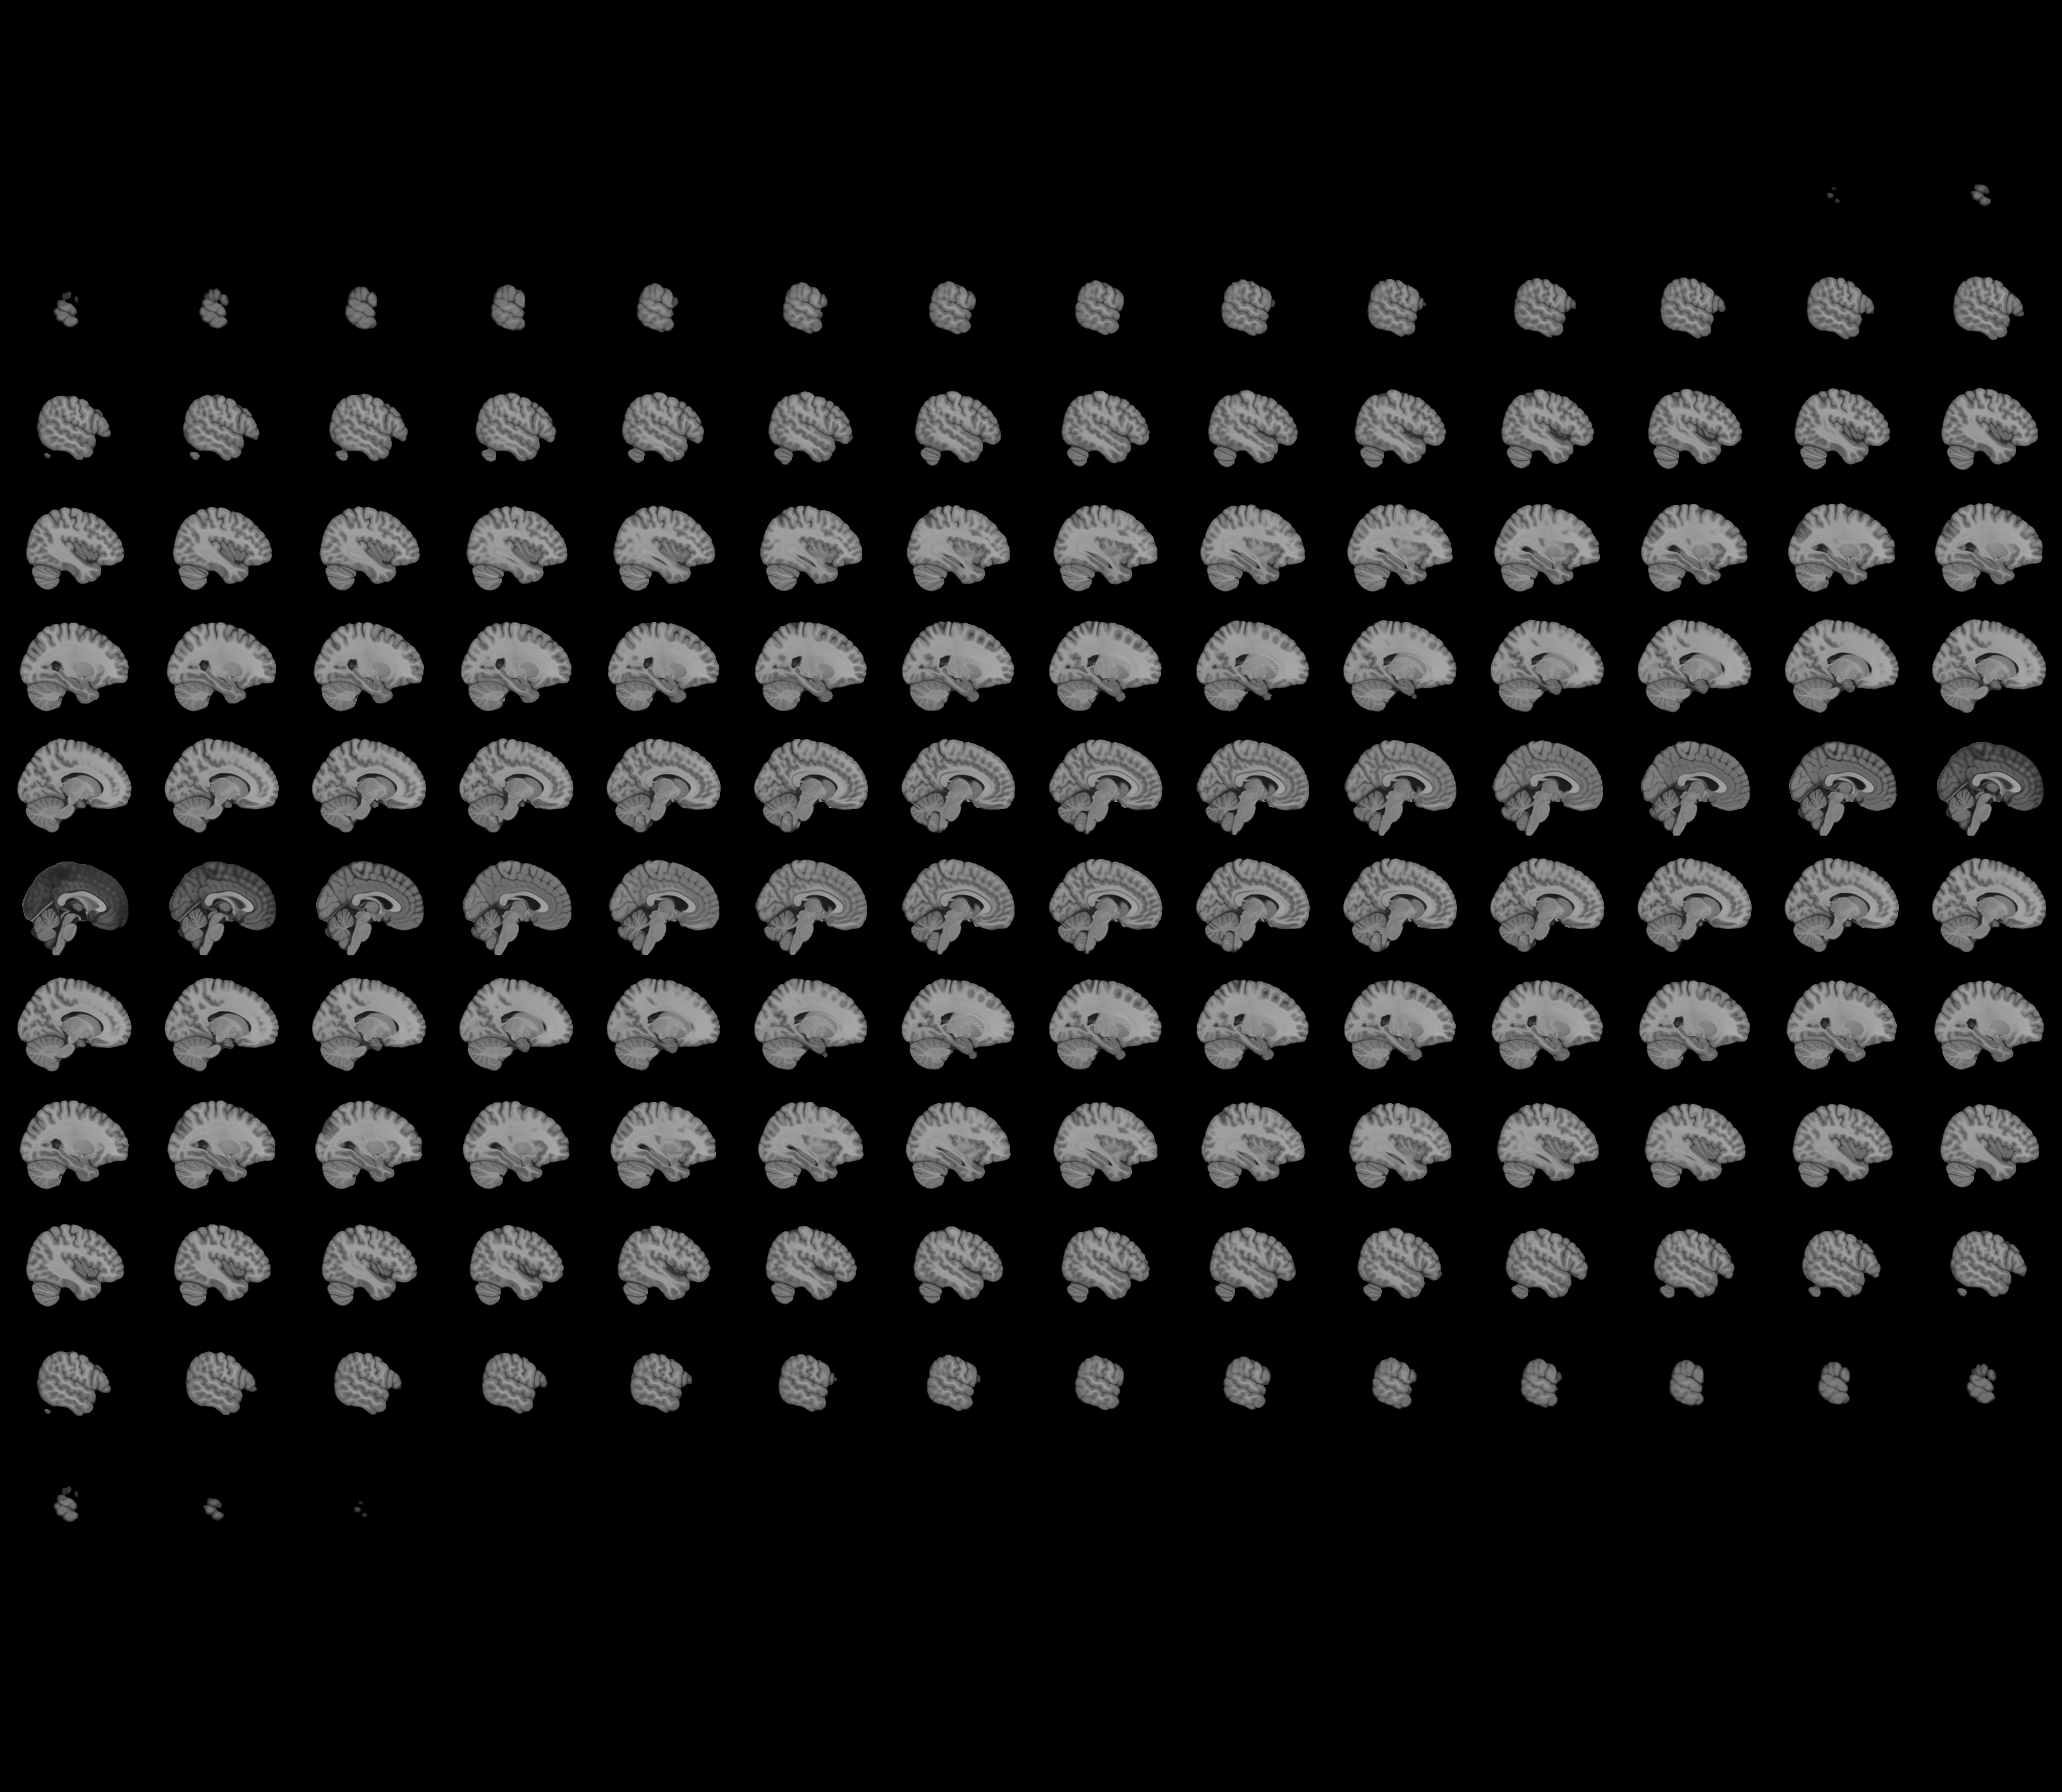
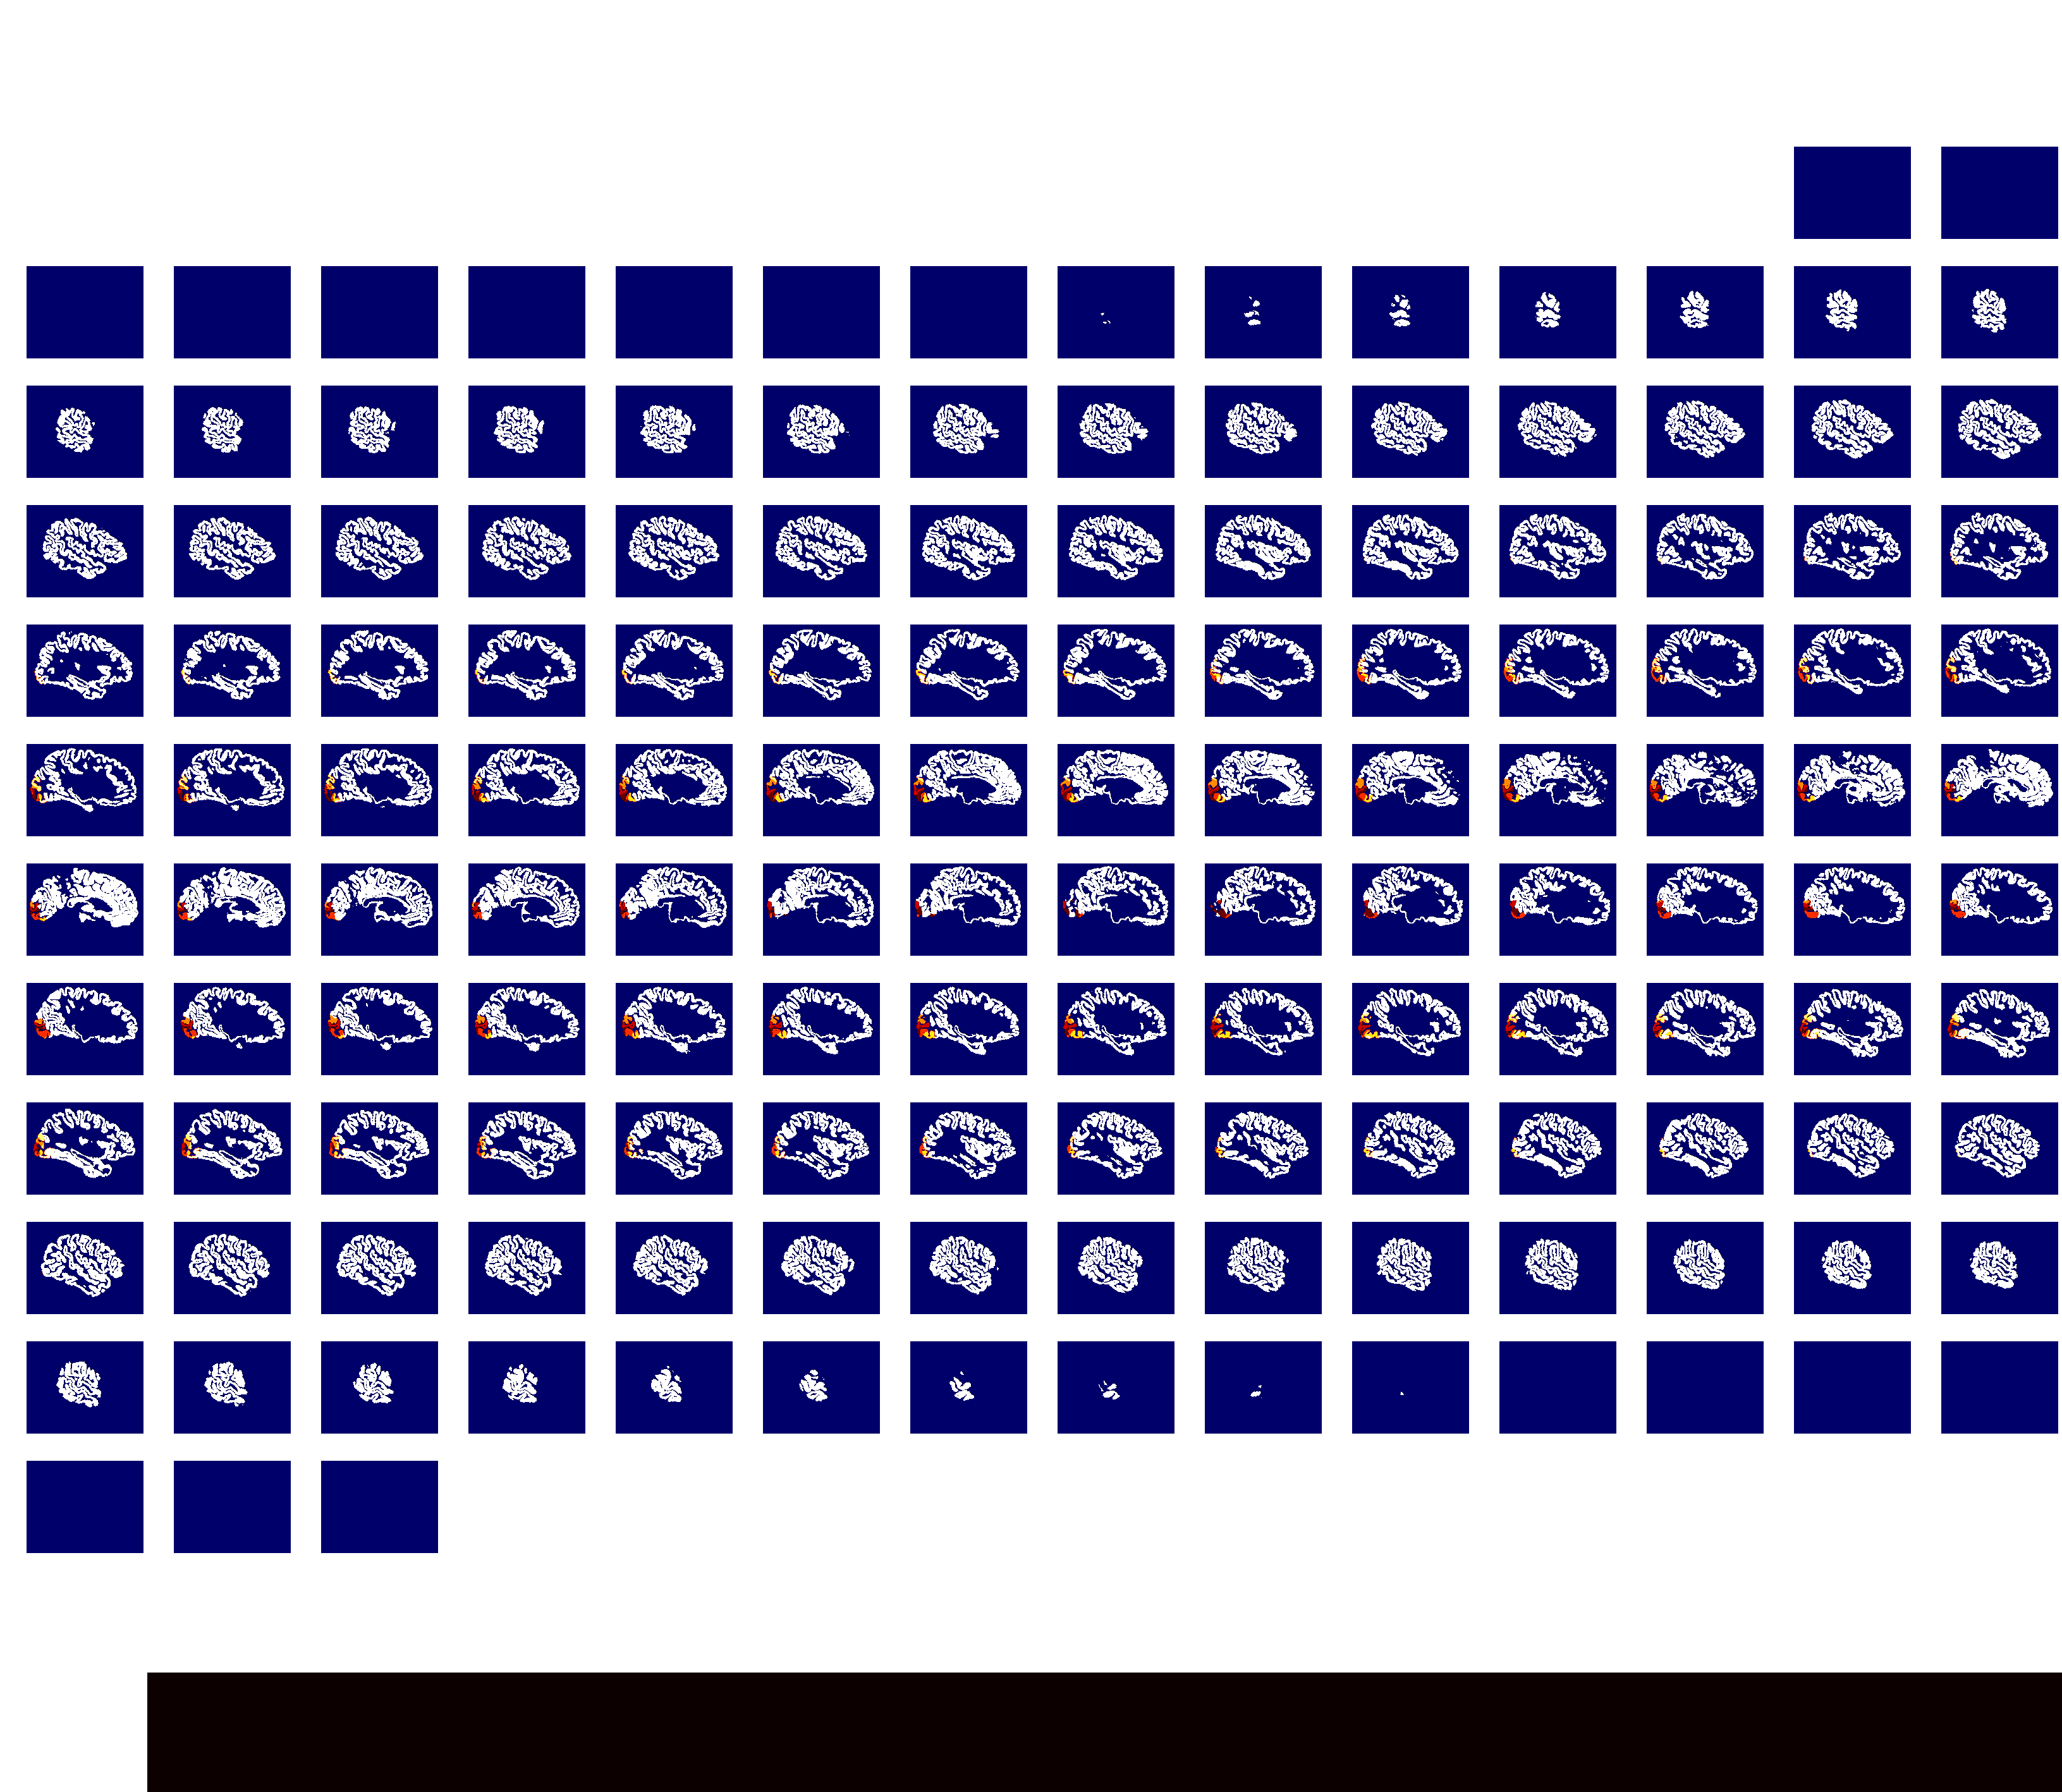

In [55]:
plotting.view_img(voxel_img, threshold = 0.5)

In [56]:
# # Plot ROIs on a surface 
# SURF_ROOT  = '/gpfs01/bartels/user/hbhatnagar/NSD_dataset/nsddata/ppdata/subj01/anat/aseg_1pt0.nii.gz'
# # display = plotting.plot_surf_roi(voxel_img)
# surf_img = image.load_img(SURF_ROOT)

In [57]:
# Combine the D-V masks into single masks for V1,V2, and V3

v1_mask_img = math_img("np.logical_or(img==1, img==2)",img=voxel_img)
v2_mask_img = math_img("np.logical_or(img==3, img==4)",img=voxel_img)
v3_mask_img = math_img("np.logical_or(img==5, img==6)",img=voxel_img)
v4_mask_img = math_img("img==7",img=voxel_img)

In [58]:
# Save the images to dir, to be used later 

nib.save(v1_mask_img, '../data/v1_mask_img.nii')

nib.save(v2_mask_img, '../data/v2_mask_img.nii')

nib.save(v3_mask_img, '../data/v3_mask_img.nii')

nib.save(v4_mask_img, '../data/v4_mask_img.nii')


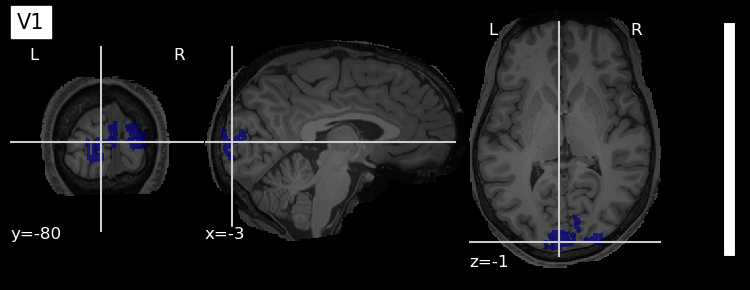

In [59]:
display = plotting.plot_roi(v1_mask_img,colorbar=True,bg_img =t1_masked_img, title = 'V1')


In [60]:
display.close()

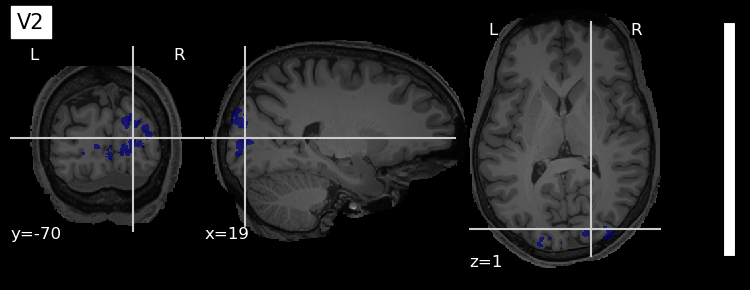

In [61]:
display = plotting.plot_roi(v2_mask_img,colorbar=True,bg_img =t1_masked_img,title = 'V2')


In [62]:
display.close()

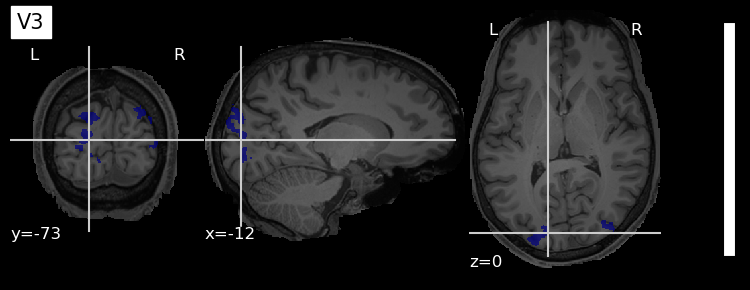

In [63]:
display = plotting.plot_roi(v3_mask_img,colorbar=True,bg_img =t1_masked_img,title = 'V3')


In [64]:
display.close()

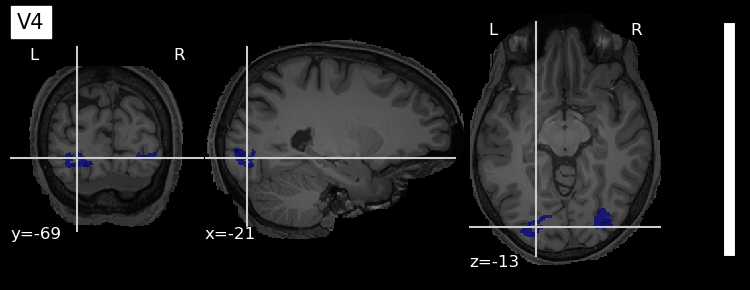

In [65]:
display = plotting.plot_roi(v4_mask_img,colorbar=True,bg_img =t1_masked_img,title = 'V4')


In [61]:
display.close()

# Load pRF (eccentricity and angle) data and mask them with visual cortex masks

In [66]:
from pathlib import Path
from nilearn.masking import apply_mask
from nilearn.maskers import NiftiMasker

In [67]:
prf_img = {}

for file in os.listdir(PRF_PATH):
    if file.startswith("prf"):
        
        # print(file)
        # Split the file name based on the extension and use the basename for creating new vars
        li = file.split('.')
        basename = li[0]
        # print(basename)
        filename = basename+'_imgfile'
        # filename = image.load_img(PRF_PATH,file)
        print(f"Loaded file {file}")
        # print(filename)
        
        prf_img[filename]= image.load_img(PRF_PATH+file)
        

Loaded file prf_R2.nii.gz
Loaded file prf_size.nii.gz
Loaded file prf_eccentricity.nii.gz
Loaded file prf_angle.nii.gz
Loaded file prf_exponent.nii.gz
Loaded file prf_gain.nii.gz
Loaded file prf_meanvol.nii.gz


In [72]:
prf_img.keys()

dict_keys(['prf_R2_imgfile', 'prf_size_imgfile', 'prf_eccentricity_imgfile', 'prf_angle_imgfile', 'prf_exponent_imgfile', 'prf_gain_imgfile', 'prf_meanvol_imgfile'])

In [73]:
# angle_data = prf_img["prf_angle_imgfile"].get_fdata()


## Apply mask to the angle data 

In [74]:
v1_masker = NiftiMasker(mask_img = v1_mask_img, standardize = True)
v2_masker = NiftiMasker(mask_img = v2_mask_img, standardize = True)
v3_masker = NiftiMasker(mask_img = v3_mask_img, standardize = True)
v4_masker = NiftiMasker(mask_img = v4_mask_img, standardize = True)

In [75]:
angle_data_v1 = v1_masker.fit_transform(prf_img["prf_angle_imgfile"])
ecc_data_v1 = v1_masker.fit_transform(prf_img["prf_eccentricity_imgfile"])
size_data_v1 = v1_masker.fit_transform(prf_img["prf_size_imgfile"])
r2_data_v1 = v1_masker.fit_transform(prf_img["prf_R2_imgfile"])

angle_data_v2 = v2_masker.fit_transform(prf_img["prf_angle_imgfile"])
ecc_data_v2 = v2_masker.fit_transform(prf_img["prf_eccentricity_imgfile"])
size_data_v2 = v2_masker.fit_transform(prf_img["prf_size_imgfile"])
r2_data_v2 = v2_masker.fit_transform(prf_img["prf_R2_imgfile"])



angle_data_v3 = v3_masker.fit_transform(prf_img["prf_angle_imgfile"])
ecc_data_v3 = v3_masker.fit_transform(prf_img["prf_eccentricity_imgfile"])
size_data_v3 = v3_masker.fit_transform(prf_img["prf_size_imgfile"])
r2_data_v3 = v3_masker.fit_transform(prf_img["prf_R2_imgfile"])


angle_data_v4 = v4_masker.fit_transform(prf_img["prf_angle_imgfile"])
ecc_data_v4 = v4_masker.fit_transform(prf_img["prf_eccentricity_imgfile"])
size_data_v4 = v4_masker.fit_transform(prf_img["prf_size_imgfile"])
r2_data_v4 = v4_masker.fit_transform(prf_img["prf_R2_imgfile"])


/gpfs01/bartels/user/hbhatnagar/anaconda3/envs/NSD-Saliency/lib/python3.8/site-packages/nilearn/signal.py:69: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


# Save masks and number of voxels for each ROI to disk

In [76]:
PRF_PATH

'/gpfs01/bartels/user/hbhatnagar/NSD_dataset/nsddata/ppdata/subj01/func1mm/'

In [77]:
roi_path_faces = PRF_PATH+'roi/floc-faces.nii.gz' 
roi_path_viz= PRF_PATH+'roi/prf-visualrois.nii.gz'
roi_path_bodies = PRF_PATH+'roi/floc-bodies.nii.gz'
roi_path_places = PRF_PATH+'roi/floc-places.nii.gz'
roi_path_words= PRF_PATH+'roi/floc-words.nii.gz'
roi_path_kastner = PRF_PATH+'roi/Kastner2015.nii.gz' 

voxel_img_viz = image.load_img(roi_path_viz)
voxel_img_faces = image.load_img(roi_path_faces)
voxel_img_bodies = image.load_img(roi_path_bodies)
voxel_img_places = image.load_img(roi_path_places)
voxel_img_words = image.load_img(roi_path_words)
voxel_img_kastner = image.load_img(roi_path_kastner)


# Seperate the regions based on their integer labelling 
v1_mask_img = math_img("np.logical_or(img==1, img==2)",img=voxel_img_viz) # Combine dorsal and ventral into one 
v2_mask_img = math_img("np.logical_or(img==3, img==4)",img=voxel_img_viz)
v3_mask_img = math_img("np.logical_or(img==5, img==6)",img=voxel_img_viz)
v4_mask_img = math_img("img==7",img=voxel_img_viz)

ofa_mask_img = math_img("img == 1",img=voxel_img_faces)
ffa1_mask_img = math_img("img == 2",img=voxel_img_faces)
ffa2_mask_img = math_img("img == 3",img=voxel_img_faces)
mtl_faces_mask_img = math_img("img == 4",img=voxel_img_faces)
atl_mask_img = math_img("img == 5",img=voxel_img_faces)

eba_mask_img = math_img("img == 1",img=voxel_img_bodies)
fba1_mask_img = math_img("img == 2",img=voxel_img_bodies)
fba2_mask_img = math_img("img == 3",img=voxel_img_bodies)
mtl_bodies_mask_img = math_img("img == 4",img=voxel_img_bodies)

opa_mask_img = math_img("img == 1",img=voxel_img_places)
ppa_mask_img = math_img("img == 2",img=voxel_img_places)
rsc_mask_img = math_img("img == 3",img=voxel_img_places)

owfa_mask_img = math_img("img == 1",img=voxel_img_words)
vwfa_1_mask_img = math_img("img == 2",img=voxel_img_words)
vwfa_2_mask_img = math_img("img == 3",img=voxel_img_words)
mfs_words_mask_img = math_img("img == 4",img=voxel_img_words)
mtl_words_mask_img = math_img("img == 5",img=voxel_img_words)


vo1_mask_img = math_img("img ==  8", img = voxel_img_kastner)
vo2_mask_img = math_img("img ==  9", img = voxel_img_kastner)
phc1_mask_img = math_img("img == 10", img = voxel_img_kastner)
phc2_mask_img = math_img("img == 11", img = voxel_img_kastner)
mst_mask_img = math_img("img ==  12", img = voxel_img_kastner)
hmt_mask_img = math_img("img ==  13", img = voxel_img_kastner)
lo2_mask_img = math_img("img ==  14", img = voxel_img_kastner)
lo1_mask_img = math_img("img ==  15", img = voxel_img_kastner)
v3b_mask_img = math_img("img ==  16", img = voxel_img_kastner)
v3a_mask_img = math_img("img ==  17", img = voxel_img_kastner)
ips0_mask_img = math_img("img == 18", img = voxel_img_kastner)
ips1_mask_img = math_img("img == 19", img = voxel_img_kastner)
ips2_mask_img = math_img("img == 20", img = voxel_img_kastner)
ips3_mask_img = math_img("img == 21", img = voxel_img_kastner)
ips4_mask_img = math_img("img == 22", img = voxel_img_kastner)
ips5_mask_img = math_img("img == 23", img = voxel_img_kastner)
spl1_mask_img = math_img("img == 24", img = voxel_img_kastner)
fef_mask_img = math_img("img ==  25", img = voxel_img_kastner)



mask_list = [v1_mask_img, v2_mask_img, v3_mask_img, v4_mask_img,
            ofa_mask_img,ffa1_mask_img, ffa2_mask_img, atl_mask_img,
            eba_mask_img, fba1_mask_img, fba2_mask_img,
            opa_mask_img, ppa_mask_img, rsc_mask_img,
            owfa_mask_img, vwfa_1_mask_img,vwfa_2_mask_img , mfs_words_mask_img, mtl_words_mask_img,
                
            vo1_mask_img, vo2_mask_img , phc1_mask_img, phc2_mask_img, mst_mask_img, hmt_mask_img,lo2_mask_img, 
            lo1_mask_img, v3b_mask_img, v3a_mask_img, ips0_mask_img, ips1_mask_img,ips2_mask_img, ips3_mask_img, 
            ips4_mask_img, ips5_mask_img, spl1_mask_img, fef_mask_img] 

    
rois = ["v1","v2","v3","v4",
       "ofa","ffa1", "ffa2", "atl",
       "eba","fba1", "fba2",
       "opa", "ppa", "rsc",
       "owfa", "vwfa_1", "vwfa_2", "mfs_words", "mtl_words",
       
       "vo1","vo2","phc1","phc2","mst","hmt","lo2","lo1",
       "v3b","v3a","ips0","ips1","ips2","ips3","ips4",
       "ips5","spl1","fef"]


In [78]:
num_voxel_rois_dict = {}

for mask, roi in zip(mask_list,rois):
    
    masker = NiftiMasker(mask_img = mask, standardize = True)
    
    # Just mask one of the pRF params to get the number of voxels
    angle_data = masker.fit_transform(prf_img["prf_angle_imgfile"])
    
    nib.save(mask, f"{DATA_PATH}/{roi}_mask_img.nii")
    print(f"Saved {roi}_mask_img.nii to disk")
    num_voxel_rois_dict[roi] = angle_data.shape[1]    


/gpfs01/bartels/user/hbhatnagar/anaconda3/envs/NSD-Saliency/lib/python3.8/site-packages/nilearn/signal.py:69: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


Saved v1_mask_img.nii to disk
Saved v2_mask_img.nii to disk
Saved v3_mask_img.nii to disk
Saved v4_mask_img.nii to disk
Saved ofa_mask_img.nii to disk
Saved ffa1_mask_img.nii to disk
Saved ffa2_mask_img.nii to disk
Saved atl_mask_img.nii to disk
Saved eba_mask_img.nii to disk
Saved fba1_mask_img.nii to disk
Saved fba2_mask_img.nii to disk
Saved opa_mask_img.nii to disk
Saved ppa_mask_img.nii to disk
Saved rsc_mask_img.nii to disk
Saved owfa_mask_img.nii to disk
Saved vwfa_1_mask_img.nii to disk
Saved vwfa_2_mask_img.nii to disk
Saved mfs_words_mask_img.nii to disk
Saved mtl_words_mask_img.nii to disk
Saved vo1_mask_img.nii to disk
Saved vo2_mask_img.nii to disk
Saved phc1_mask_img.nii to disk
Saved phc2_mask_img.nii to disk
Saved mst_mask_img.nii to disk
Saved hmt_mask_img.nii to disk
Saved lo2_mask_img.nii to disk
Saved lo1_mask_img.nii to disk
Saved v3b_mask_img.nii to disk
Saved v3a_mask_img.nii to disk
Saved ips0_mask_img.nii to disk
Saved ips1_mask_img.nii to disk
Saved ips2_mask_

In [79]:
num_voxel_rois_dict

{'v1': 7887,
 'v2': 8296,
 'v3': 7022,
 'v4': 3976,
 'ofa': 2077,
 'ffa1': 2854,
 'ffa2': 1823,
 'atl': 935,
 'eba': 17406,
 'fba1': 2294,
 'fba2': 2539,
 'opa': 9393,
 'ppa': 5927,
 'rsc': 3360,
 'owfa': 2701,
 'vwfa_1': 4671,
 'vwfa_2': 3009,
 'mfs_words': 973,
 'mtl_words': 675,
 'vo1': 1263,
 'vo2': 1839,
 'phc1': 1141,
 'phc2': 1032,
 'mst': 303,
 'hmt': 1665,
 'lo2': 1099,
 'lo1': 1966,
 'v3b': 1830,
 'v3a': 3957,
 'ips0': 3450,
 'ips1': 2755,
 'ips2': 2969,
 'ips3': 2960,
 'ips4': 361,
 'ips5': 72,
 'spl1': 941,
 'fef': 410}

In [80]:
import pickle

with open(DATA_PATH+'/num_voxel_rois_dict.pkl','wb') as fp:
    pickle.dump(num_voxel_rois_dict, fp)
    print('Dict. saved successfully')

Dict. saved successfully


In [62]:
# np.save(DATA_PATH+"/num_voxel_rois_dict.npy",num_voxel_rois_dict)

# Visualizations 

In [71]:
print(angle_data_v1.shape,ecc_data_v1.shape)
print(angle_data_v2.shape,ecc_data_v2.shape)
print(angle_data_v3.shape,ecc_data_v3.shape)
print(angle_data_v4.shape,ecc_data_v4.shape)

(1, 7887) (1, 7887)
(1, 8296) (1, 8296)
(1, 7022) (1, 7022)
(1, 3976) (1, 3976)


In [72]:
angle_data_v1[0,:].shape

(7887,)

In [73]:
print( np.unique(angle_data_v1, return_counts = True) )
print ( np.unique(ecc_data_v1, return_counts = True) )

(array([  0.   ,   0.   ,   0.012, ..., 359.986, 359.987, 359.997],
      dtype=float32), array([1, 1, 1, ..., 1, 1, 1]))
(array([   0.003,    0.004,    0.005, ...,   33.06 ,  699.385, 1000.   ],
      dtype=float32), array([1, 1, 1, ..., 1, 1, 5]))


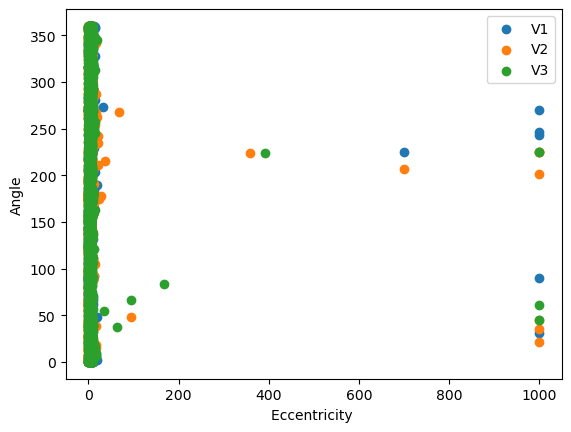

In [74]:
x = range(0,400)
y= range(0,1100)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(ecc_data_v1[0,:],angle_data_v1[0,:], label = 'V1')
ax1.scatter(ecc_data_v2[0,:],angle_data_v2[0,:], label = 'V2')
ax1.scatter(ecc_data_v3[0,:],angle_data_v3[0,:], label = 'V3')

ax1.set_xlabel('Eccentricity ')
ax1.set_ylabel('Angle')


plt.legend()
plt.show()

In [75]:
# Here the angle referes to the polar angle of the pRF center (b/w 0 and 360 degrees) 
# Eccentricity - eccentricity of the pRF center

Here the angle is sigma/sqrt(exponent)

So sigma = prfsize*sqrt(expt)



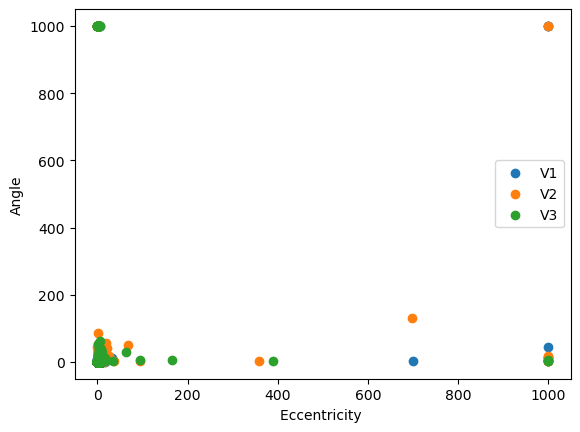

In [76]:
# x = range(0,400)
# y= range(0,1100)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(ecc_data_v1[0,:],size_data_v1[0,:], label = 'V1')
ax1.scatter(ecc_data_v2[0,:],size_data_v2[0,:], label = 'V2')
ax1.scatter(ecc_data_v3[0,:],size_data_v3[0,:], label = 'V3')

ax1.set_xlabel('Eccentricity ')
ax1.set_ylabel('Angle')


plt.legend()
plt.show()

In [77]:
# Convert size to sigma 

exp_data_v1 = v1_masker.fit_transform(prf_img["prf_exponent_imgfile"])
exp_data_v2 = v2_masker.fit_transform(prf_img["prf_exponent_imgfile"])
exp_data_v3 = v3_masker.fit_transform(prf_img["prf_exponent_imgfile"])
exp_data_v4 = v4_masker.fit_transform(prf_img["prf_exponent_imgfile"])



print(exp_data_v1.shape,exp_data_v2.shape,exp_data_v3.shape)

sigma_data_v1 = size_data_v1 * np.sqrt(exp_data_v1)
sigma_data_v2 = size_data_v2 * np.sqrt(exp_data_v2)
sigma_data_v3 = size_data_v3 * np.sqrt(exp_data_v3)
sigma_data_v4 = size_data_v4 * np.sqrt(exp_data_v4)

print(sigma_data_v1.shape,sigma_data_v2.shape,sigma_data_v3.shape, sigma_data_v4.shape)

(1, 7887) (1, 8296) (1, 7022)
(1, 7887) (1, 8296) (1, 7022) (1, 3976)


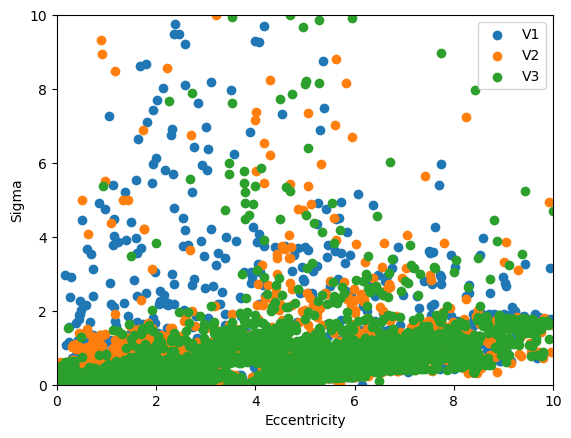

In [78]:
# x = range(0,400)
# y= range(0,1100)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(ecc_data_v1[0,:],sigma_data_v1[0,:], label = 'V1')
ax1.scatter(ecc_data_v2[0,:],sigma_data_v2[0,:], label = 'V2')
ax1.scatter(ecc_data_v3[0,:],sigma_data_v3[0,:], label = 'V3')

ax1.set_xlabel('Eccentricity')
ax1.set_ylabel('Sigma')


ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
plt.legend()
plt.show()

In [79]:
# Bin the sigma and average across 0-1, 1-2 and so on 
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]

digitized_sigma_v1 = np.digitize(x=ecc_data_v1, bins = bins)  # ecc 
digitized_sigma_v2 = np.digitize(x=ecc_data_v2, bins = bins) 
digitized_sigma_v3 = np.digitize(x=ecc_data_v3, bins = bins) 
digitized_sigma_v4 = np.digitize(x=ecc_data_v4, bins = bins) 



binned_sigma_v1 = [sigma_data_v1[digitized_sigma_v1 == i].mean() for i in range(1,len(bins))]
binned_sigma_v2 = [sigma_data_v2[digitized_sigma_v2 == i].mean() for i in range(1,len(bins))]
binned_sigma_v3 = [sigma_data_v3[digitized_sigma_v3 == i].mean() for i in range(1,len(bins))]
binned_sigma_v4= [sigma_data_v4[digitized_sigma_v4 == i].mean() for i in range(1,len(bins))]



In [80]:
binned_sigma_v1

[0.12093296,
 0.33517045,
 0.38493338,
 0.8138828,
 0.2807292,
 0.51638,
 0.8097146,
 1.2920172,
 0.92417973,
 1.7101859,
 2.3131518,
 3.5925782]

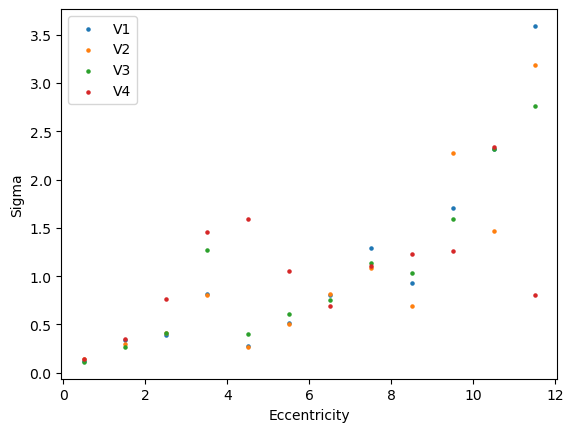

In [83]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# x = np.linspace(0,12, 12)
x = np.arange(0,12,0.5)
x = x[1::2]


# ax1.scatter(ecc_data_v1[0,:],sigma_data_v1[0,:], label = 'V1')
# ax1.scatter(ecc_data_v2[0,:],sigma_data_v2[0,:], label = 'V2')
# ax1.scatter(ecc_data_v3[0,:],sigma_data_v3[0,:], label = 'V3')
s = 5

ax1.scatter(x, binned_sigma_v1, label = 'V1',s=s)
ax1.scatter(x, binned_sigma_v2, label = 'V2',s=s)
ax1.scatter(x, binned_sigma_v3, label = 'V3',s=s)
ax1.scatter(x, binned_sigma_v4, label = 'V4',s=s)

ax1.set_xlabel('Eccentricity')
ax1.set_ylabel('Sigma')


# ax1.set_xlim([0,10])
# ax1.set_ylim([0,10])
plt.legend()
plt.show()

In [106]:
# Try pandas method 
import pandas as pd
import seaborn as sns
import binsreg
from binsreg import binsreg

In [155]:
def create_df_from_prfdata(vis_roi,
                           params=['angle','ecc','sigma','r2'],
                           ):
    '''
    Create a pandas dataframe given a list of pRF parameters and the ROI (V1,V2,V3,and V4) 
    '''
    
    param_names = [name+'_data'+'_'+vis_roi for name in params] # Create ['angle_data_v1', 'ecc_data_v1', 'sigma_data_v1', 'r2_data_v1']
    
    
    # Create a dataframe according to the parameter names 
    df = pd.DataFrame(data=[ globals()[param_name][0,:] for param_name in param_names])
    df = df.T
    # Renames the column names 
    df.columns = param_names
    return df
    

In [169]:
prf_df_v1 = create_df_from_prfdata('v1')
prf_df_v2 = create_df_from_prfdata('v2')
prf_df_v3 = create_df_from_prfdata('v3')
prf_df_v4 = create_df_from_prfdata('v4')


In [157]:
prf_df_v1

angle_data_v1  ecc_data_v1  sigma_data_v1  r2_data_v1
0        179.639786     0.166852       0.003727    3.616053
1         15.860787     0.690822       0.110961   11.148829
2        163.424911     0.257483       0.022927    2.095020
3        155.249649     0.013332       0.003601    4.394990
4        157.556778     4.178980       0.003570    5.346769
...             ...          ...            ...         ...
7882     247.916855     4.322491       0.016936    1.650220
7883       2.510942     0.042029       0.003745   10.291285
7884     105.356026     0.050834       0.213105    5.850232
7885      15.703278     6.140235       0.000000  -20.667374
7886       1.702758     0.045146       0.090679    1.994491

[7887 rows x 4 columns]

<AxesSubplot:xlabel='ecc_data_v1', ylabel='sigma_data_v1'>

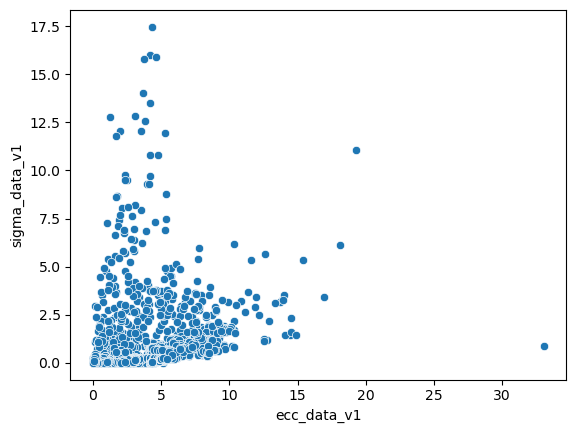

In [176]:
sns.scatterplot(x='ecc_data_v1',y='sigma_data_v1',data=prf_df_v1.query("ecc_data_v1 < 35 & sigma_data_v1 < 20 & r2_data_v1 > 0"))
# plt.xlim(0,35)
# plt.ylim(0,20)

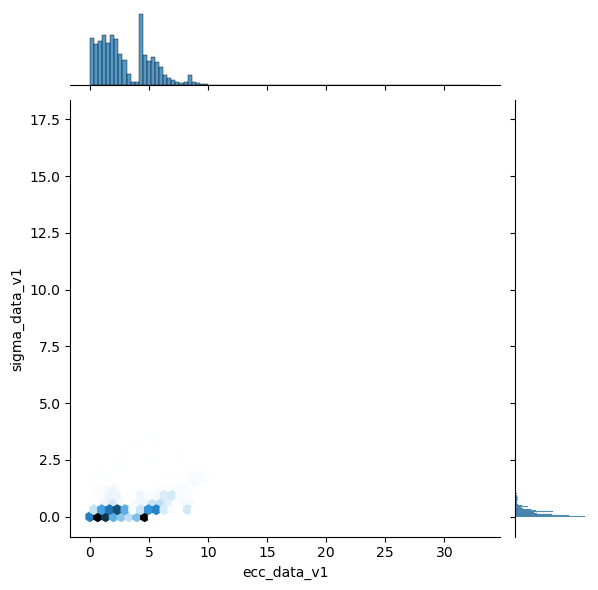

In [103]:
# divide the eccentricity ( conditioning var) into bins and plot the conditional mean of the dependent var (sigma) 
# within each bin

s = sns.jointplot(x='ecc_data_v1',y='sigma_data_v1',
                  data=prf_df_v1.query("ecc_data_v1 < 35 & sigma_data_v1 < 20"),
                  kind = 'hex')


In [159]:
import binsreg

def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(df[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est

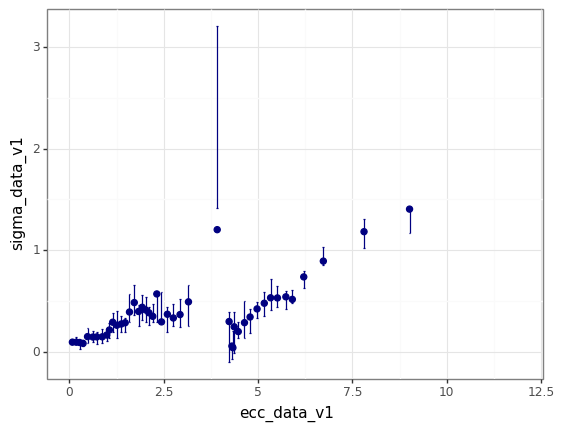

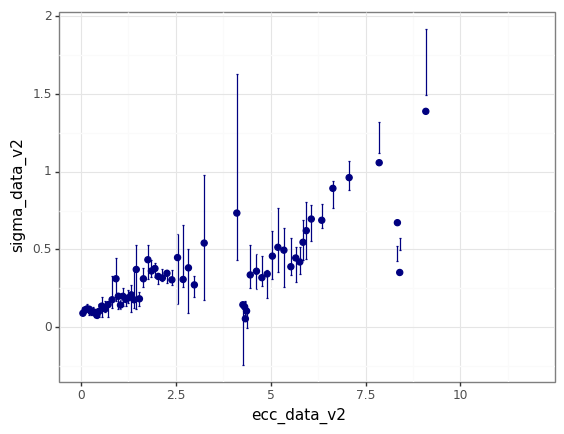

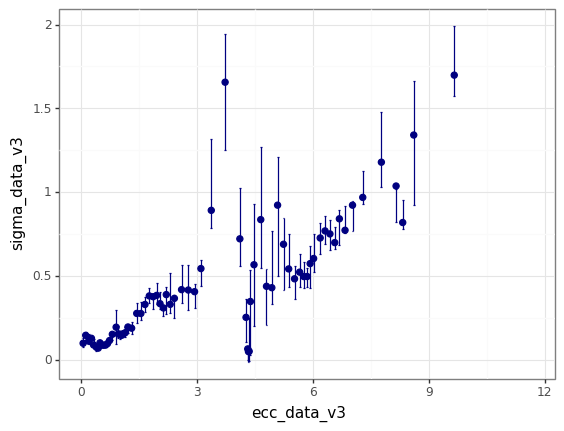

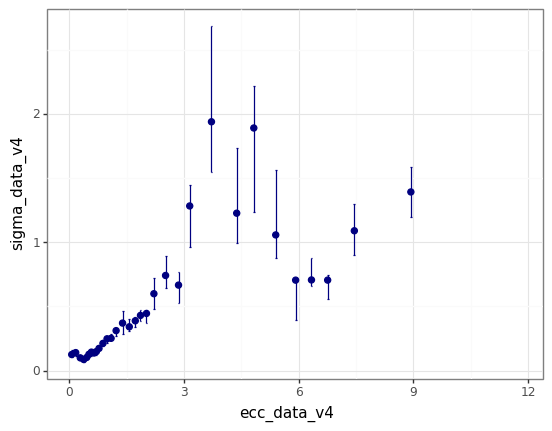

group  ecc_data_v1  bin  isknot  mid  sigma_data_v1      ci_l  \
0   Full Sample     0.080152    0       0    0       0.094529  0.085217   
1   Full Sample     0.183149    1       0    0       0.094515  0.071916   
2   Full Sample     0.272249    2       0    0       0.091297  0.029507   
3   Full Sample     0.362732    3       0    0       0.082568  0.057663   
4   Full Sample     0.481376    4       0    0       0.149155  0.085191   
5   Full Sample     0.623037    5       0    0       0.145011  0.098000   
6   Full Sample     0.726801    6       0    0       0.146356  0.080277   
7   Full Sample     0.871033    7       0    0       0.147171  0.087655   
8   Full Sample     0.990752    8       0    0       0.165166  0.102890   
9   Full Sample     1.061573    9       0    0       0.214538  0.139771   
10  Full Sample     1.148333   10       0    0       0.290765  0.194069   
11  Full Sample     1.258224   11       0    0       0.261067  0.131644   
12  Full Sample     1.373511   12       0    0       0.273015  0.197914   
13  Full Sample     1.479201   13       0    0       0.285481  0.197511   
14  Full Sample     1.593369   14       0    0       0.391260  0.290573   
15  Full Sample     1.719941   15       0    0       0.484094  0.365545   
16  Full Sample     1.834535   16       0    0       0.396556  0.253479   
17  Full Sample     1.929954   17       0    0       0.437799  0.317425   
18  Full Sample     2.019253   18       0    0       0.411968  0.296889   
19  Full Sample     2.107468   19       0    0       0.383826  0.262239   
20  Full Sample     2.209923   20       0    0       0.348671  0.293438   
21  Full Sample     2.317362   21       0    0       0.569103  0.294234   
22  Full Sample     2.441351   22       0    0       0.293987  0.302166   
23  Full Sample     2.597102   23       0    0       0.369270  0.193954   
24  Full Sample     2.754653   24       0    0       0.332577  0.251668   
25  Full Sample     2.932706   25       0    0       0.365973  0.245759   
26  Full Sample     3.155970   26       0    0       0.491384  0.250027   
27  Full Sample     3.917506   27       0    0       1.201435  1.413194   
28  Full Sample     4.233015   28       0    0       0.297554 -0.100655   
29  Full Sample     4.307615   29       0    0       0.056314 -0.071157   
30  Full Sample     4.333405   30       0    0       0.039788  0.056115   
31  Full Sample     4.367961   31       0    0       0.245825 -0.012894   
32  Full Sample     4.475608   32       0    0       0.198606  0.138344   
33  Full Sample     4.640341   33       0    0       0.286371  0.132473   
34  Full Sample     4.788600   34       0    0       0.342100  0.181604   
35  Full Sample     4.974075   35       0    0       0.421890  0.331692   
36  Full Sample     5.164781   36       0    0       0.477591  0.347195   
37  Full Sample     5.332295   37       0    0       0.531248  0.414285   
38  Full Sample     5.513677   38       0    0       0.529862  0.437821   
39  Full Sample     5.736712   39       0    0       0.540742  0.421624   
40  Full Sample     5.908314   40       0    0       0.515632  0.480980   
41  Full Sample     6.210819   41       0    0       0.736745  0.626615   
42  Full Sample     6.729705   42       0    0       0.892010  0.852611   
43  Full Sample     7.807967   43       0    0       1.181699  1.022040   
44  Full Sample     9.014323   44       0    0       1.403635  1.167137   

        ci_r        ci  
0   0.123058  0.037841  
1   0.147303  0.075387  
2   0.101676  0.072169  
3   0.117703  0.060040  
4   0.234155  0.148965  
5   0.206206  0.108205  
6   0.190090  0.109813  
7   0.226543  0.138888  
8   0.224460  0.121570  
9   0.285479  0.145708  
10  0.377224  0.183155  
11  0.399820  0.268176  
12  0.351698  0.153784  
13  0.333327  0.135816  
14  0.570243  0.279670  
15  0.652439  0.286894  
16  0.458897  0.205418  
17  0.563053  0.245628  
18  0.542284  0.245395  
19  0.444495  0.182256  
20  0.471558  0.178120  
21  0.591

In [172]:
df_est_v1 = binscatter(x='ecc_data_v1',y='sigma_data_v1',
                       data=prf_df_v1.query("ecc_data_v1 < 12 & sigma_data_v1 < 20 & r2_data_v1 > 0"), 
                       ci=(3,3),randcut=1)

df_est_v2 = binscatter(x='ecc_data_v2',y='sigma_data_v2',
                       data=prf_df_v2.query("ecc_data_v2 < 12 & sigma_data_v2 < 20 & r2_data_v2 > 0"), 
                       ci=(3,3),randcut=1)
df_est_v3 = binscatter(x='ecc_data_v3',y='sigma_data_v3',
                       data=prf_df_v3.query("ecc_data_v3 < 12 & sigma_data_v3 < 20 & r2_data_v3 > 0"), 
                       ci=(3,3),randcut=1)
df_est_v4 = binscatter(x='ecc_data_v4',y='sigma_data_v4',
                       data=prf_df_v4.query("ecc_data_v4 < 12 & sigma_data_v4 < 20 & r2_data_v4 > 0"), 
                       ci=(3,3),randcut=1)
df_est_v1

# df_est_v2 = binscatter(x='ecc_data_v2',y='sigma_data_v2',data=prf_df_v2)


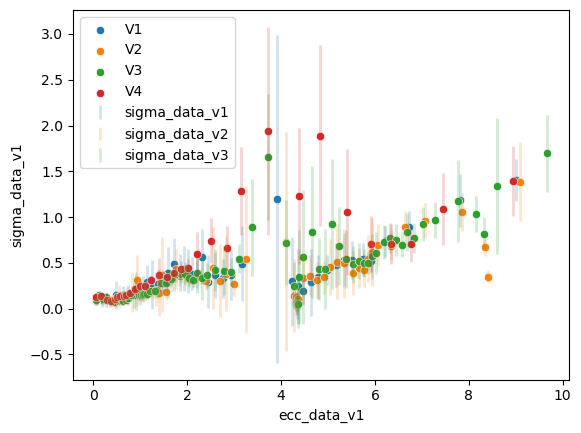

In [178]:
# Binned scatter plot 
sns.scatterplot(x='ecc_data_v1',y='sigma_data_v1',data=df_est_v1, label = 'V1')
plt.errorbar('ecc_data_v1', 'sigma_data_v1', yerr='ci', data=df_est_v1, ls='', lw=2, alpha=0.2);

sns.scatterplot(x='ecc_data_v2',y='sigma_data_v2',data=df_est_v2, label = 'V2')
plt.errorbar('ecc_data_v2', 'sigma_data_v2', yerr='ci', data=df_est_v2, ls='', lw=2, alpha=0.2);

sns.scatterplot(x='ecc_data_v3',y='sigma_data_v3',data=df_est_v3, label = 'V3')
plt.errorbar('ecc_data_v3', 'sigma_data_v3', yerr='ci', data=df_est_v3, ls='', lw=2, alpha=0.2);

sns.scatterplot(x='ecc_data_v4',y='sigma_data_v4',data=df_est_v4, label = 'V4')
plt.errorbar('ecc_data_v4', 'sigma_data_v4', yerr='ci', data=df_est_v4, ls='', lw=2, alpha=0.2);
